In [1]:
import sys 
import os

#BaM Stuff
sys.path.append(os.path.abspath("/Users/mouginot/work/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd

import matplotlib.pyplot as plt
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


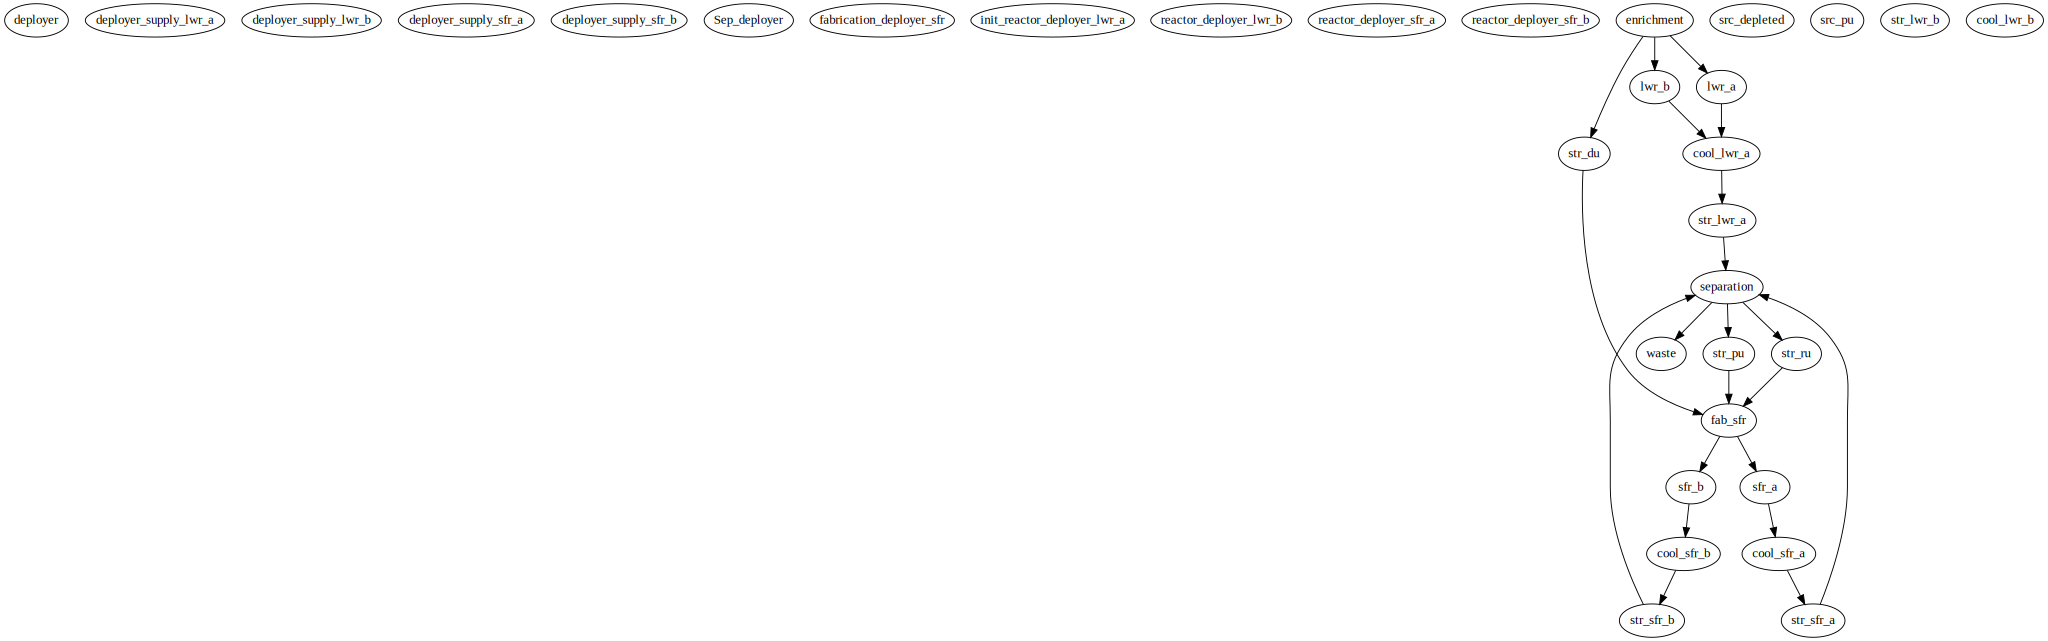

In [2]:
cyh.MakeFlowGraph("main_sep.sqlite")

In [3]:
db = cym.dbopen("main_sep.sqlite")
ev = cym.Evaluator(db=db, write=False)

In [4]:
dfp = tm.get_power(ev)

/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:226: UserWarning: no faciity provided
  warnings.warn(wng_msg, UserWarning)


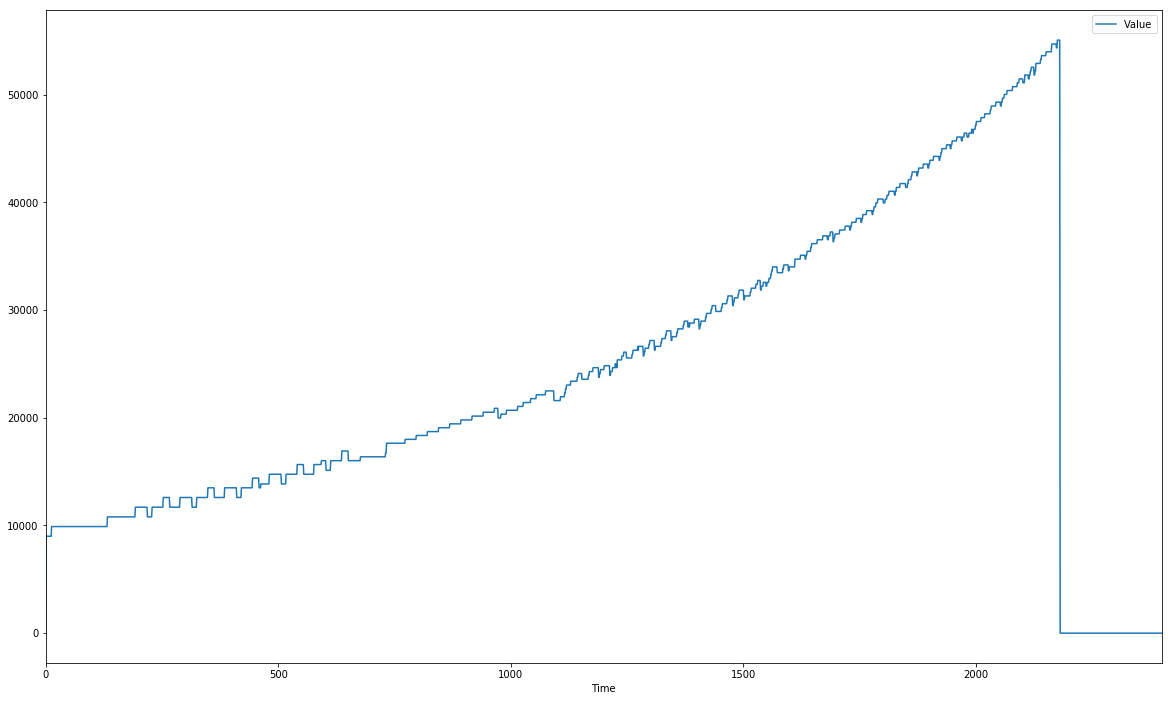

In [5]:
dfp.plot('Time','Value',figsize = (20,12))

In [10]:
df2_y_unit = pd.DataFrame()

df2_y_unit['Time'] = df2_y['Time']
df2_y_build_unit = pd.DataFrame()
df2_y_unit['Unit'] = df2_y['Mass']


df2_y_unit['Unit'] = df2_y_unit['Unit'].apply(lambda x: int(x) + 1 if x > int(x) else int(x))



df2_y_build_unit['Time'] = df2_y_unit['Time']
df2_y_build_unit['Build'] = (df2_y_unit['Unit'] - df2_y_unit['Unit'].shift(1))
df2_y_build_unit= df2_y_build_unit.dropna()


#df2_y_build_unit['Build'] = df2_y_build_unit['Build'].apply(lambda x: int(x) + 1 if x > int(x) else int(x))
df2_y_build_unit = df2_y_build_unit.loc[df2_y_build_unit.Build>0]
df2_y_build_unit['Time'] *= 12.

for row in df2_y_build_unit.itertuples():
   print("<val>",int(row.Time),'</val>',sep="")
print()
for row in df2_y_build_unit.itertuples():
   print("<val>",int(row.Build),'</val>',sep="")


print()
print(df2_y_build_unit['Time'].values/12.)
print(df2_y_build_unit['Build'].values)

#### REMEMBER to add the first step !!

<val>456</val>
<val>1115</val>
<val>1562</val>
<val>2018</val>

<val>1</val>
<val>1</val>
<val>1</val>
<val>1</val>

[38.08333333333333 92.91666666666667 130.16666666666666 168.16666666666666]
[1. 1. 1. 1.]


In [11]:
df2_y_build_unit['Build'].sum()

4.0

In [12]:
fac = ['str_pu']
nucs = ()
coms = ()


df3 = tm.inventories(ev, facilities=fac)

/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:133: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


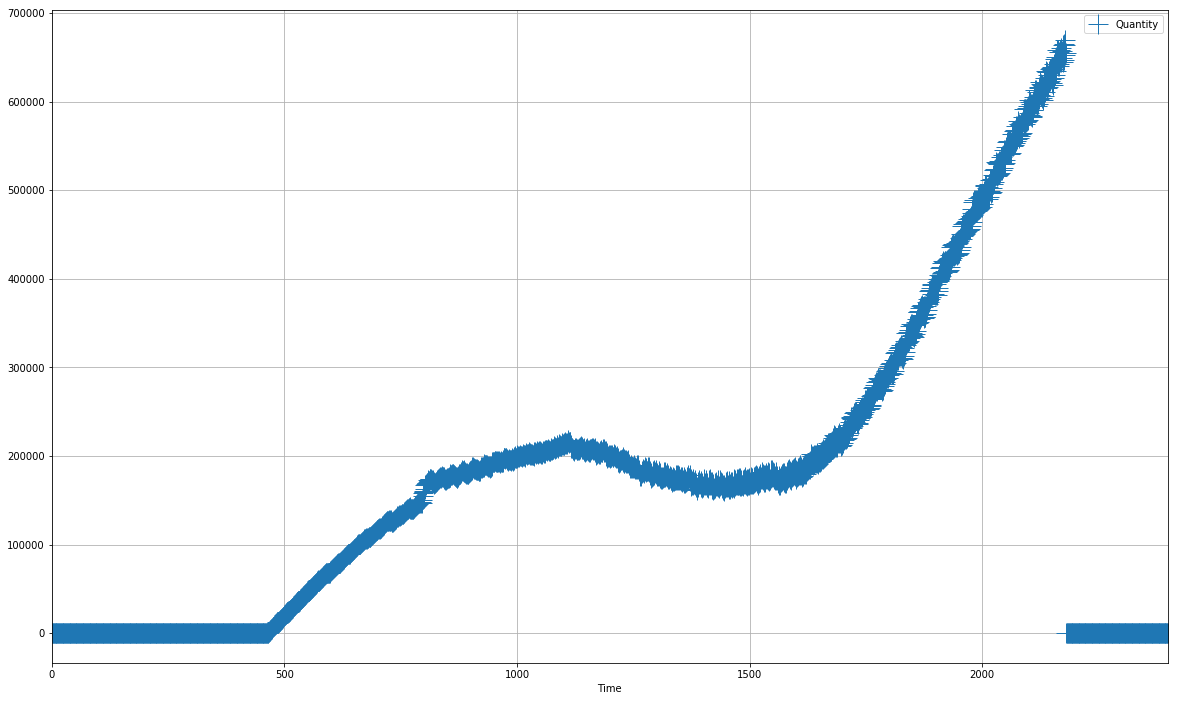

In [13]:
df3_y_m = df3
ax = df3_y_m.plot('Time','Quantity',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [14]:
rec = ()
send = ['fab_sfr']
nucs = ()
coms = ()

sfr_frac = cyh.TransFrac(ev=ev, rec=rec, send=send, nucs2=['PU238','PU239','PU240','PU241','PU242'],nucs1=['U235','U238'])

In [15]:
sfr_frac

,Time,Mass
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


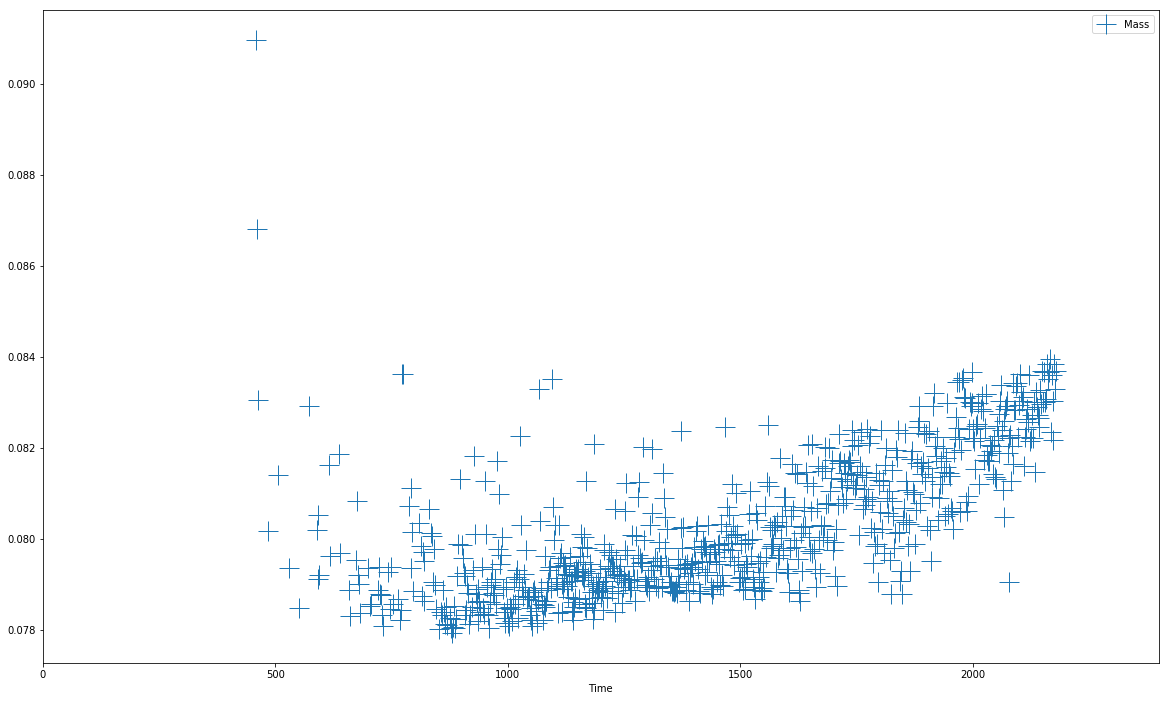

In [16]:
ax = sfr_frac.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))

In [17]:
rec = ['fab_sfr']
send = ['str_pu']
nucs = ()
coms = ()


df3_ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)



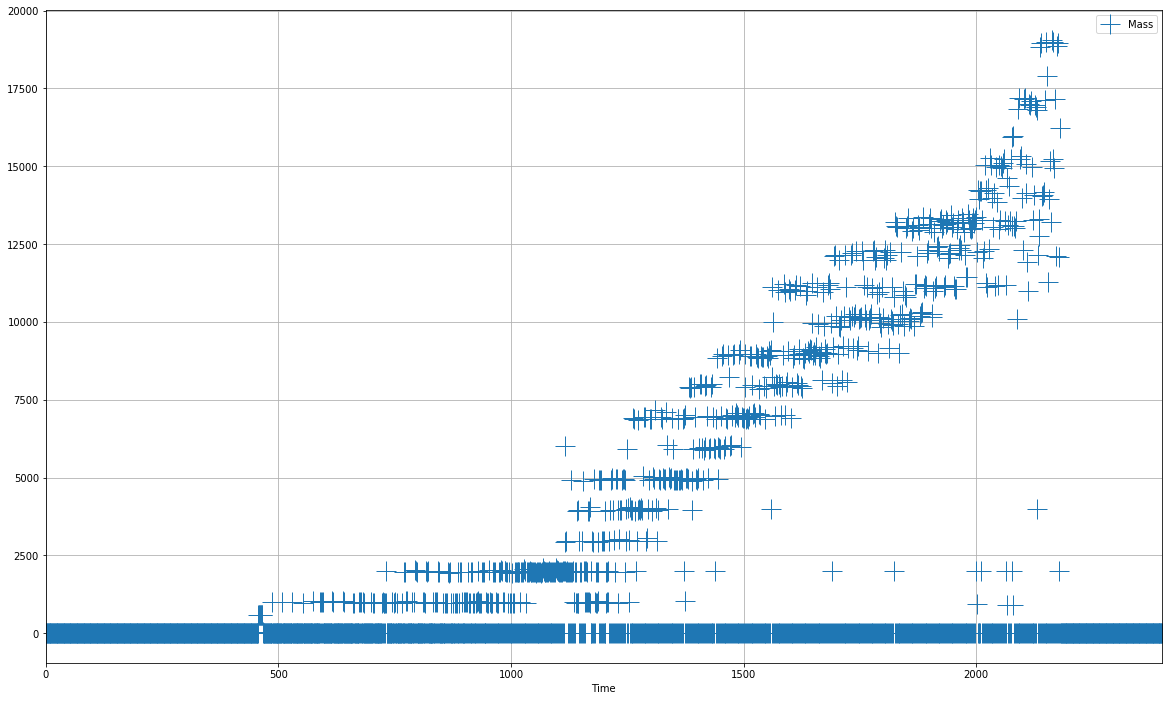

In [18]:
ax = df3_.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [19]:
df3_['Mass'].sum()

5212928.591939252

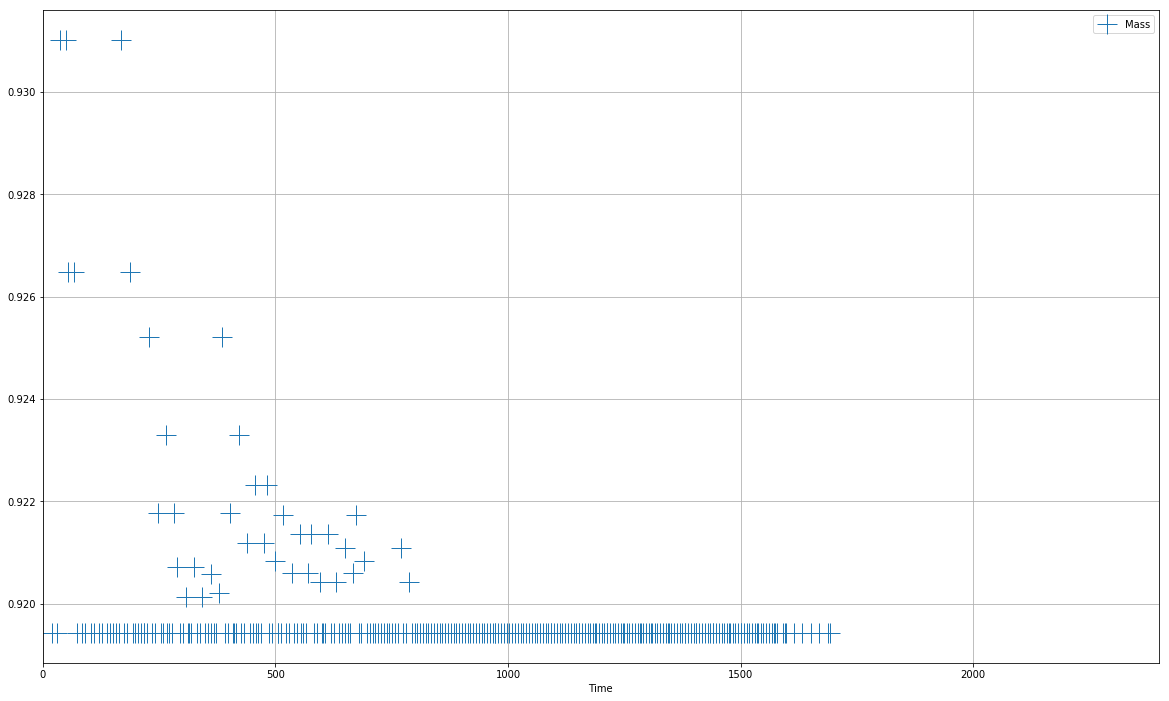

In [20]:
send = ['lwr_a','lwr_b']
rec = ()
nucs = ['U238']
coms = ()


df3__ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)
df3_tot = tm.transactions(ev, receivers=rec, senders=send, commodities=coms)

df3__['Mass'] *= 1./df3_tot['Mass']

ax = df3__.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

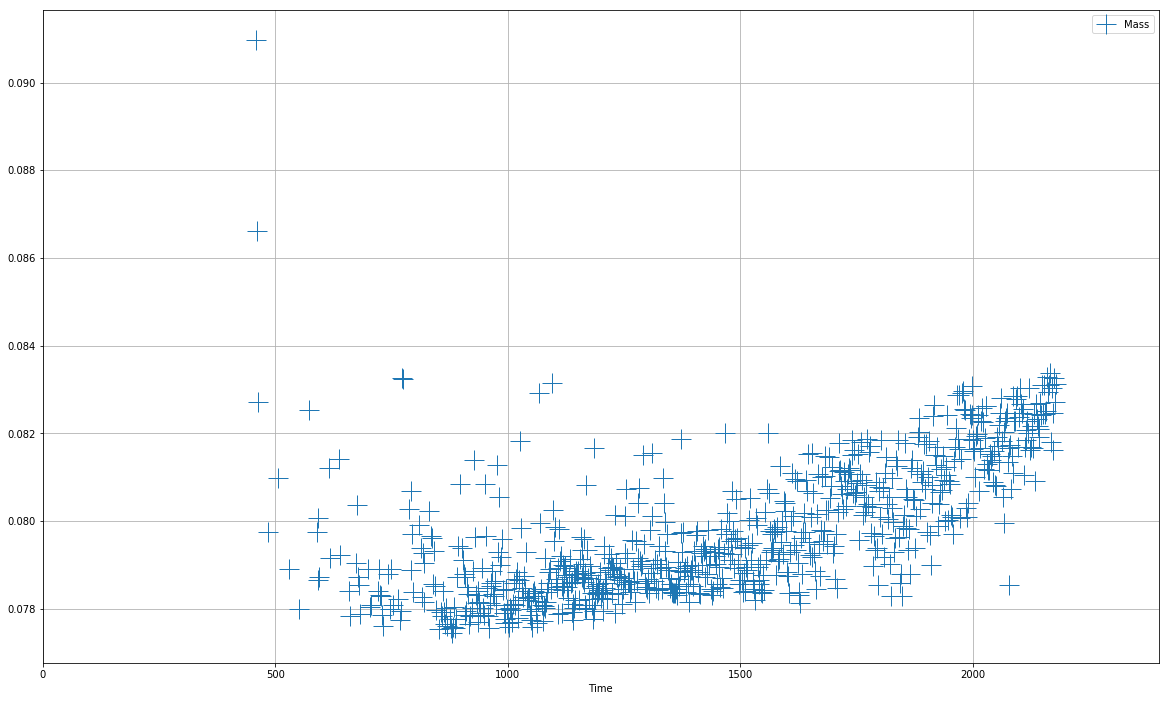

In [21]:
send = ['fab_sfr']
rec = ()
nucs = ['Pu238','Pu239','Pu240','Pu241','Pu242']
coms = ()


df3__ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)
df3_tot = tm.transactions(ev, receivers=rec, senders=send, commodities=coms)

df3__['Mass'] *= 1./df3_tot['Mass']

ax = df3__.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [22]:
df3_tot['Mass'].sum()

64277135.0

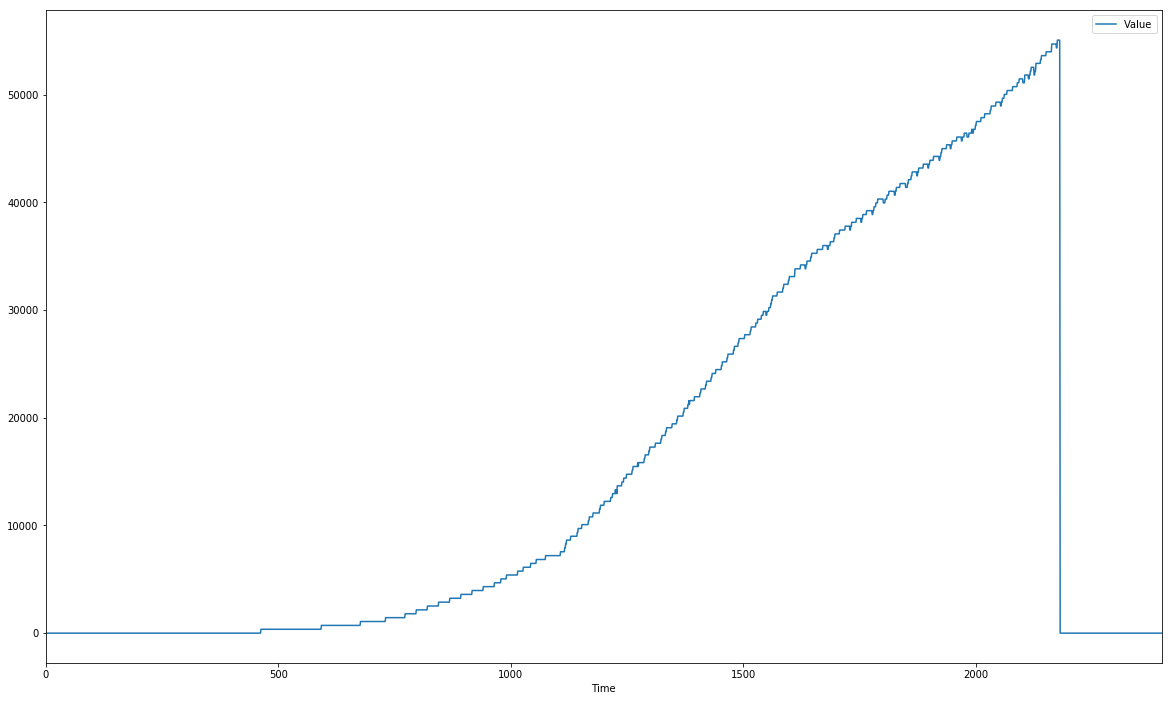

In [23]:
dfp = tm.get_power(ev, facilities=["sfr_a","sfr_b"])
dfp.plot('Time','Value',figsize = (20,12))

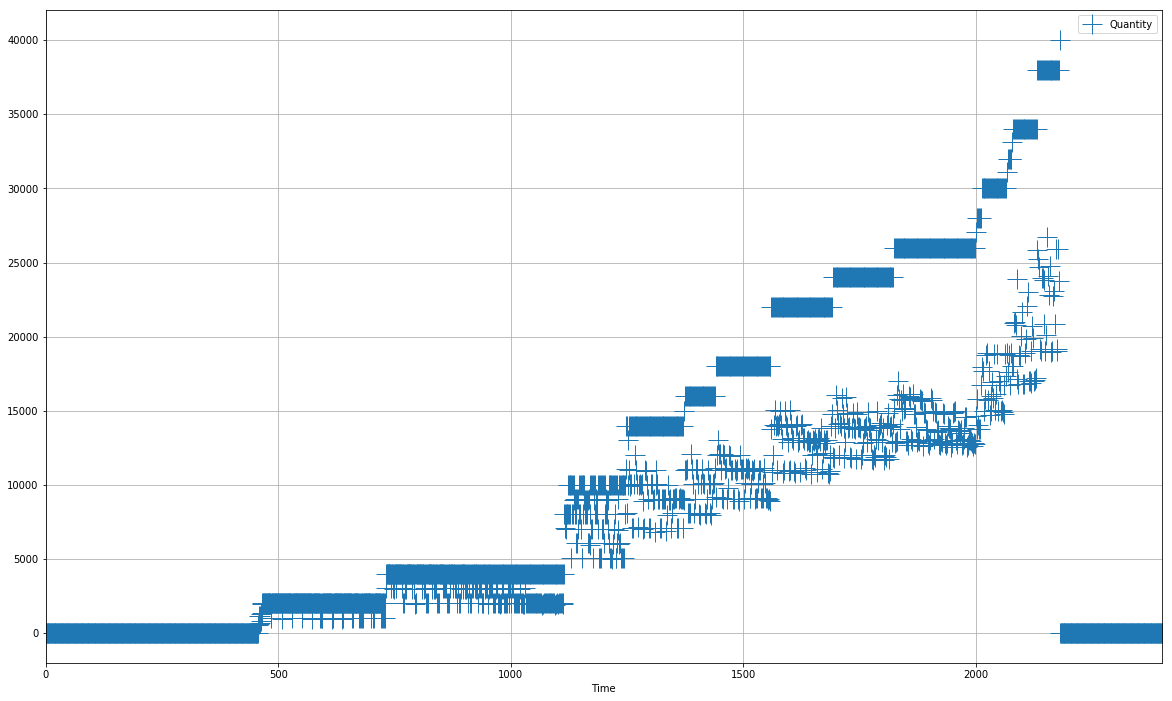

In [24]:
fac = ['fab_sfr']
nucs = ['Pu238','Pu239','Pu240','Pu241','Pu242']
coms = ()


df3 = tm.inventories(ev, facilities=fac, nucs=nucs)


df3_y_m = df3
ax = df3_y_m.plot('Time','Quantity',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

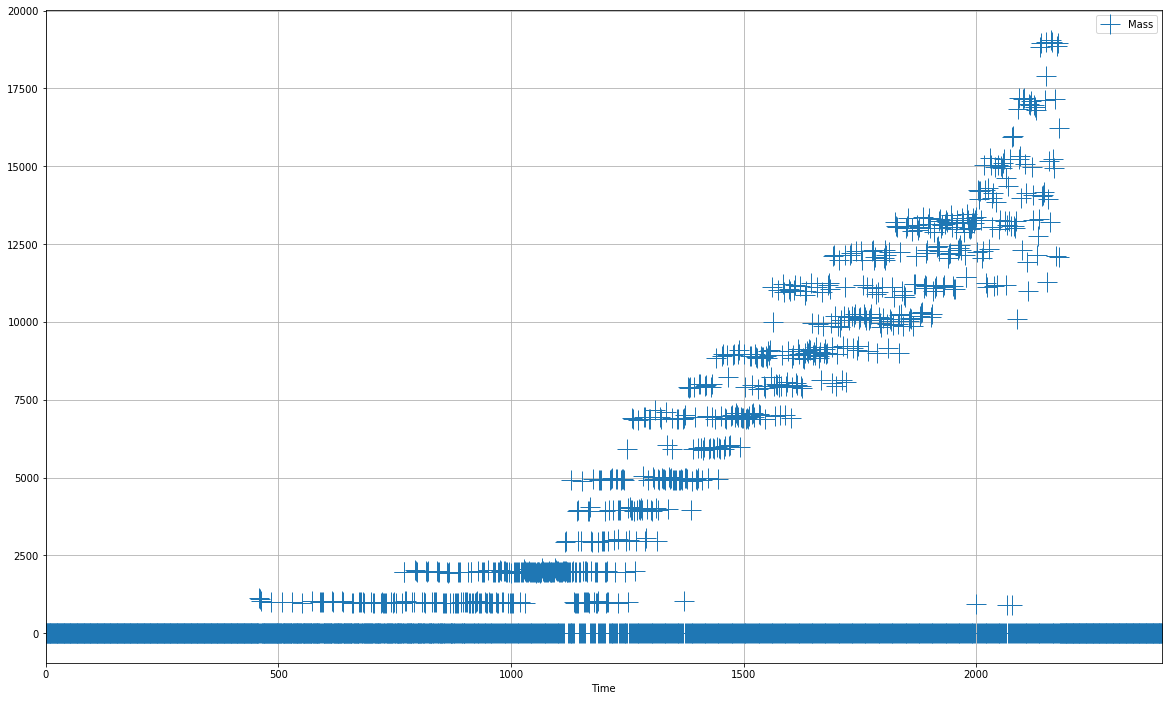

In [25]:
send = ['fab_sfr']
rec = ()
nucs = ['Pu238','Pu239','Pu240','Pu241','Pu242']
coms = ()


df3__ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)
df3_tot = tm.transactions(ev, receivers=rec, senders=send, commodities=coms)

#df3__['Mass'] *= 1./df3_tot['Mass']

ax = df3__.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [26]:
df3__.sum()

1.558190e+06\s1

SyntaxError: unexpected character after line continuation character (<ipython-input-26-eed3020a3e3d>, line 3)

In [ ]:
df3_y_m